# Assignment 1: Add your title

In [ ]:
# necessary libraries (replace with relevant library imports)

## How to sumbit (remove when submitting)

You will submit through Canvas a `.html` file obtained from a Python `.ipynb` Jupyter Notebook file. To do so, in your `.ipynb` file, follow these steps: `File –> Save and Export as.. –> HTML.` 

**Important:** Prior to this step, the notebook needs to be rendered (i.e. all the cells should be executed). Other file formats will not be accepted

## Introduction, Context and Short literature review on the problem (250 words)

Add your text here

### Map1 - Number of Properties at Risk by Local Flood Authority

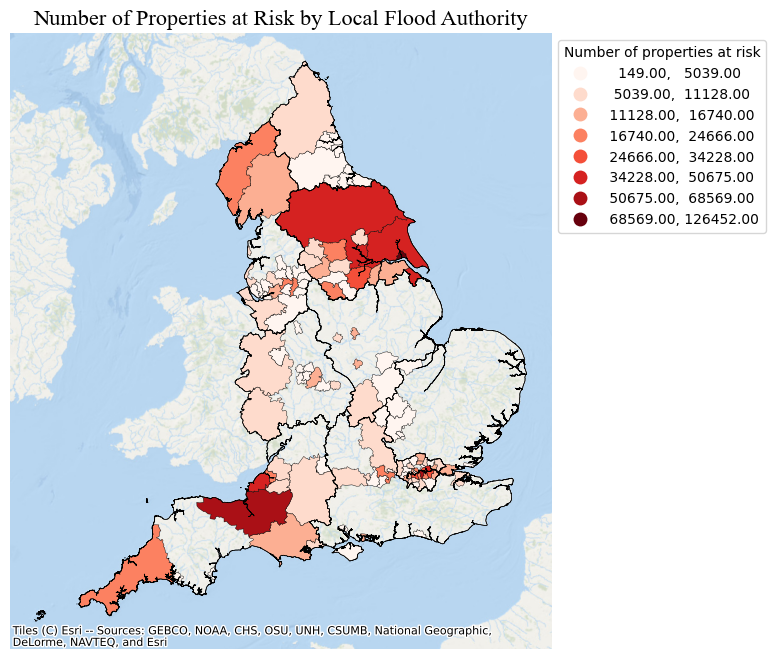

In [6]:
# Introductory Static Maps (replace with code and comments)
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

#Reading Files
#Local Disctrict Authoricties Shapefile ("Cities)
local_districts = gpd.read_file("data/Local_Authority_Districts_May_2024_Boundaries_UK_BUC_3499872675230401373.zip")
#local_districts.head()
#CSV contain the number properties at risk by lead local flood authority
properties_at_risk = pd.read_csv("data/PROPERTIES_AT_RISK_BY_LEAD_LOCAL_FLOOD_AUTHORITY.csv")
uk_regions = gpd.read_file("data/RGN_DEC_24_EN_BFC.zip")
#properties_at_risk.head()

#Data Pre Processing and Cleanning:

#Making sure the properties at resk Local Districts have the same name with the local district geodaframe
properties_at_risk = properties_at_risk.rename(columns ={"AUTHORITY":"LAD24NM"})
local_districts_properties = local_districts.merge(properties_at_risk, on="LAD24NM",how="inner")#,outer would keep both, inner-just with match
local_districts_properties['Total at Risk'] = pd.to_numeric(local_districts_properties['Total at Risk'], errors='coerce') # Confert the collumn to be plotted to numerical to work with the Quantiles


#Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
uk_regions.plot(ax=ax, color = "none", edgecolor = "black", linewidth = 0.4)
local_districts_properties.plot(ax = ax, column = 'Total at Risk', edgecolor="Black", linewidth = 0.3, cmap = 'Reds', scheme="fisher_jenks", legend=True,
    legend_kwds={"title": "Number of properties at risk", "loc": "upper left","bbox_to_anchor": (1, 1),},k=8,)
ax.set_axis_off()
title_parameters = {'fontsize':'16', 'fontname':'Times New Roman'}
ax.set_title("Number of Properties at Risk by Local Flood Authority", **title_parameters) #parameters as above
basemap = ctx.providers.Esri.OceanBasemap#Esri.WorldTopoMap #OpenStreetMap.DE #ctx.providers.CartoDB.Positron
ctx.add_basemap(ax, crs=local_districts_properties.crs.to_string(), source=basemap)
uk_regions.plot(ax=ax, color = "none", edgecolor = "black", linewidth = 0.5)
plt.show()


### Map2 - Risk of Flooding from Rivers and Sea (Merseyside - Liverpool)

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # For Legend
import contextily as ctx #Base Map

#Reading the necessary data
local_districts = gpd.read_file("data/Local_Authority_Districts_May_2024_Boundaries_UK_BUC_3499872675230401373.zip")
risks_merseyside = gpd.read_file("data/rofrs_4band_merseyside.zip")
#local_districts.head()
liverpool = local_districts[local_districts["LAD24NM"] == "Liverpool"]

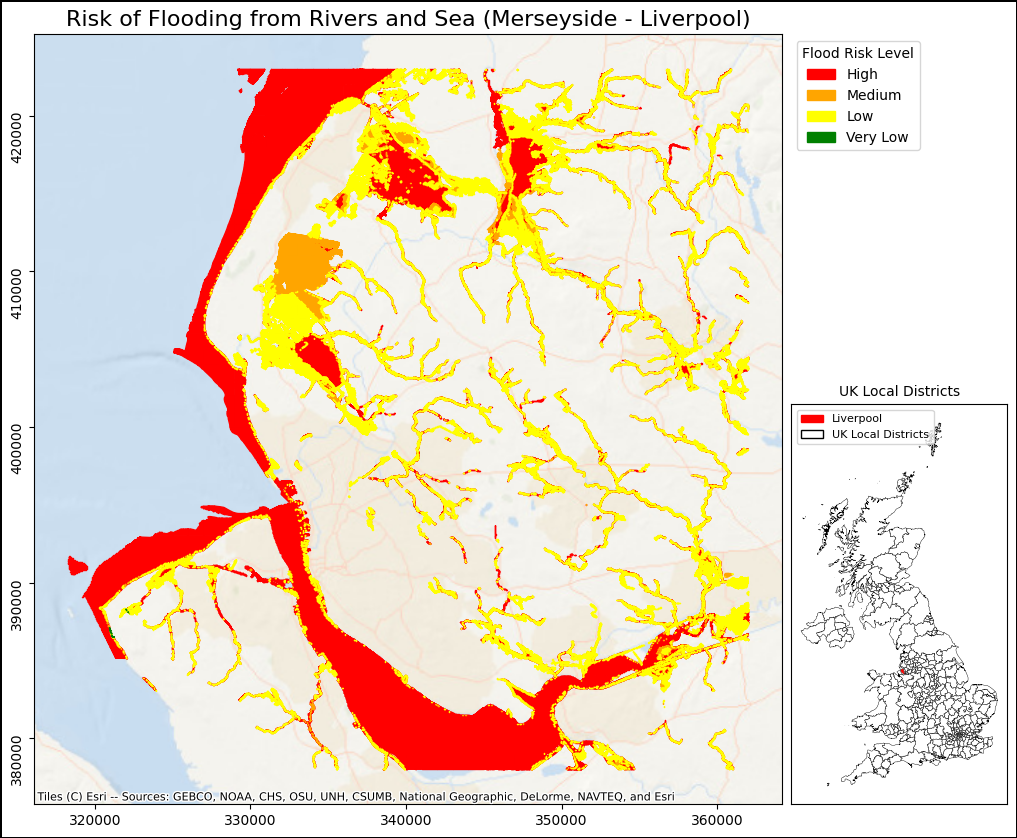

In [24]:
#Plotting:

#Creating the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#Defining color for each category
colors = {"High": "red","Medium": "orange","Low": "yellow","Very Low": "green"}

# Filtering and plotting each risk category with appropriate color
for risk_level, color in colors.items():
    gdf_filtered = risks_merseyside[risks_merseyside["risk_band"] == risk_level]
    gdf_filtered.plot(ax=ax, color=color, edgecolor=color, label=risk_level)

# Adding Basemap to the plot
basemap = ctx.providers.Esri.OceanBasemap#Esri.WorldTopoMap #OpenStreetMap.DE #ctx.providers.CartoDB.Positron
ctx.add_basemap(ax, crs=risks_merseyside.crs.to_string(), source=basemap)

# Adding Title
ax.set_title("Risk of Flooding from Rivers and Sea (Merseyside - Liverpool)", fontsize=16)

# Adding Leggend
#Creating legend for each category
risks = [mpatches.Patch(color="red", label="High"),mpatches.Patch(color="orange", label="Medium"), mpatches.Patch(color="yellow", label="Low"), mpatches.Patch(color="green", label="Very Low")]
ax.legend(handles=risks, title="Flood Risk Level", loc="upper left", bbox_to_anchor=(1.01, 1))

#Rotate the corridnate at the right side so it does not occupy unecessary space
ax.yaxis.set_tick_params(rotation=90) 

# Criating a small map to show were Liverpool is in UK
small_map = fig.add_axes([0.64, 0.11, 0.4, 0.4]) #Adding new grath at hte figure with location outside the main map and size 30X30
local_districts.plot(ax=small_map,color="white", edgecolor="black",linewidth = 0.3,) #Printing first all Local Districts
liverpool.plot(ax=small_map, color="red") # Adding to the small map liverpool in red
small_map.set_title("UK Local Districts", fontsize=10) #Adding title small map
small_map.set_xticks([]) #Removing the ticks marks
small_map.set_yticks([])
#adding Legend to the small map
liverpoo_legend = mpatches.Patch(color='red', label='Liverpool')
districts_legend = mpatches.Patch(edgecolor="black",facecolor="white", label='UK Local Districts')
small_map.legend(handles=[liverpoo_legend,districts_legend], loc="upper left", fontsize=8) 

# Adding edges for the main figure
fig.patch.set_linewidth(1)
fig.patch.set_edgecolor('black')

plt.show()

## Data Sources Presentation (200 words)

Add your text here

## API Functioning (200 words)

Add your text here

In [26]:
# Api call code (replace with code and comments)
import requests
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, MultiPolygon, Polygon

# Link for the API to return all the list of lood
api_link = "https://environment.data.gov.uk/flood-monitoring/id/floods"

# Fetch all warnings
api_results = requests.get(api_link).json() #get the results as json file
flood_wornings = api_results.get("items", []) #if empty will fill with an empty list

# Initialising the lists to store the points of flood and the  polygons that the flood apply to
points_data = []
polygons_data = []

In [ ]:
#Checking the results
#import json
#print(json.dumps(api_results, indent=4))  # Pretty print the JSON

In [45]:
# Iterating through each worning we got from the first reponse
#i=0 #debugging
for worning in flood_wornings:
    worning_id_link = worning.get("@id")  # Get the url for each worning, the "@id", is the flied in the responce that stores de ID

    if worning_id_link: # Check if @ID is not empty
        #Request the details for this flood worning
        #was getting error for some flood id request to not stop the entire resquest
        try:
            worning_results = requests.get(worning_id_link).json()
            worning_details = worning_results.get("items", {}) #
        except Exception as e:
            print(i,"No: Error geering details for", worning_id_link,":", e)
            continue
            

        # Extract the information required 
        flood_area = worning_details.get("floodArea", {}) #floodArea - is a fild in the api which return the dictionation with spatial information of the flood
        lat = flood_area["lat"]
        lon = flood_area["long"]
        polygon_link = flood_area["polygon"]  # the polygon filds a the link for requesting the polygon

        # Creating the point and adding to the list created above
        if lat != None and lon != None:
            points_data.append({
                "description": worning_details.get("description", "No description"),
                "severity": worning_details.get("severity", "Unknown"),
                "message": worning_details.get("message", ""),
                "severityLevel": worning_details.get("severityLevel", 0),
                "geometry": Point(lon, lat) #Creatning with shapely
            })
           # print("Yes",i)
           # i += 1

        # Creating the polygon and adding to the list created above
        if polygon_link: #Check if the link is not empty
            polygon_results = requests.get(polygon_link).json() #Get all the polygons in the link confert to json it might return multiple polygons under features
            polygons_worning = polygon_results.get("features", []) #get the polygons

            for polygons in polygons_worning:
                geometry = polygons.get("geometry",[]) #get the polygon geometry
                if geometry.get("type") == "MultiPolygon": #Some flood risk areas come with multiple polygon
                    coordinates = geometry["coordinates"] #the cordinaes stores the cordinates for the polygon or polygons

                    list_of_sub_polygon = []
                    for polygon in coordinates:
                        list_of_sub_polygon.append(Polygon(polygon[0]))
                    mult_polygon = MultiPolygon(list_of_sub_polygon)
            
                    ##mult_polygon = MultiPolygon([Polygon(poly[0]) for poly in coordinates])
                    
                    polygons_data.append({
                        "description": worning_details.get("description", "No description"),
                        "severity": worning_details.get("severity", "Not Given"),
                        "message": worning_details.get("message", ""),
                        "severityLevel": worning_details.get("severityLevel", 0),
                        "geometry": mult_polygon })
                elif geometry.get("type") == "Polygon": # If is a single polygon the URL
                            coordinates = geometry.get("coordinates", [])
                            polygon = Polygon(coordinates[0])
                            #Just add the polygon no need to iterate
                            polygons_data.append({
                                "description": worning_details.get("description", "No description"),
                                "severity": worning_details.get("severity", "Unknown"),
                                "severityLevel": worning_details.get("severityLevel", 0),
                                "message": worning_details.get("message", ""),
                                "geometry": polygon
                            })
            

# Convert the points and the polygon to geodataframe
gdf_points = gpd.GeoDataFrame(points_data, geometry="geometry", crs="EPSG:4326") 
gdf_polygons = gpd.GeoDataFrame(polygons_data, geometry="geometry", crs="EPSG:4326")

#Ckecking results
print("Flood Points:")
print(gdf_points.head())

print("Flood Polygons:")
print(gdf_polygons.head())

29 No: Error geering details for http://environment.data.gov.uk/flood-monitoring/id/floods/011WACN6 : Expecting value: line 1 column 1 (char 0)
Flood Points:
                                description     severity  \
0  River Windrush from Bourton to Newbridge  Flood alert   
1  River Windrush from Bourton to Newbridge  Flood alert   
2  River Windrush from Bourton to Newbridge  Flood alert   
3  River Windrush from Bourton to Newbridge  Flood alert   
4  River Windrush from Bourton to Newbridge  Flood alert   

                                             message  severityLevel  \
0  Property flooding is not currently expected. R...              3   
1  Property flooding is not currently expected. R...              3   
2  Property flooding is not currently expected. R...              3   
3  Property flooding is not currently expected. R...              3   
4  Property flooding is not currently expected. R...              3   

                    geometry  
0  POINT (-1.65082 51.8

## Interactive Map Functioning and Design Choices (200 words)

Add your text here

In [46]:
import folium
from folium.plugins import MarkerCluster, GroupedLayerControl, LocateControl, Geocoder
from folium import Popup, Icon

# Define map bounds
uk_boundares = [[50.5, -7], [59, 2]]

# Create the Folium map
map = folium.Map(control_scale=True, tiles="CartoDB positron", zoom_start=6, world_copy_jump=True) #word_copy to make sure the user stay within the word bondaries
map.fit_bounds(uk_boundares) #Stat the map at the UK

# **1. Flood Warning Areas Layer**
fg_areas = folium.FeatureGroup(name="Flood Warning Areas", show=True)

flood_warning_area = folium.GeoJson(
    gdf_polygons,
    style_function=lambda x: {
        'fillColor': 'transparent',
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5'
    },
    highlight_function=lambda x: {
        'fillColor': 'lightcoral',
        'color': 'black',
        'weight': 2,
        'dashArray': '0, 0',
        'fillOpacity': 0.5
    },
    tooltip=folium.GeoJsonTooltip(fields=["severity"], aliases=["Flood Zone: "])
).add_to(fg_areas)

map.add_child(fg_areas)

# **2. Flood Warning Points Layer**
fg_points = folium.FeatureGroup(name="Flood Warning Points", show=True)

# Updated severity-based colors (1 = Most Severe, 4 = Least Severe)
severity_colors = {0: "gray", 1: "darkred", 2: "red", 3: "orange", 4: "blue"}

# Ensure points are in the correct CRS
gdf_points = gdf_points.to_crs(epsg=4326)

# Custom JavaScript function for cluster icons with corrected severity logic
icon_create_function = """
function(cluster) {
    var markers = cluster.getAllChildMarkers();
    var minSeverity = 5;  // Set to a high number initially

    // Find the lowest-numbered (most severe) warning in the cluster
    markers.forEach(function(marker) {
        var severity = marker.options.icon.options.markerSeverity;
        if (severity < minSeverity) {
            minSeverity = severity;
        }
    });

    // Severity-based colors (1 = Dark Red, 4 = Blue)
    var severityColors = {0: 'gray', 1: 'darkred', 2: 'red', 3: 'orange', 4: 'blue'};
    var clusterColor = severityColors[minSeverity] || 'gray';

    return L.divIcon({
        html: '<div style="background-color:' + clusterColor + '; color: white; width: 40px; height: 40px; \
               display: flex; align-items: center; justify-content: center; border-radius: 10%; \
               clip-path: polygon(50% 0%, 100% 38%, 82% 100%, 18% 100%, 0% 38%);">' +
               cluster.getChildCount() + '</div>',
        className: 'custom-cluster',
        iconSize: [40, 40]
    });
}
"""

# Create cluster with custom icon function
marker_cluster = MarkerCluster(icon_create_function=icon_create_function).add_to(fg_points)

# Add Points with severity info
for _, row in gdf_points.iterrows():
    if hasattr(row.geometry, "x") and hasattr(row.geometry, "y"):
        lat, lon = row.geometry.y, row.geometry.x
        severity = row.get('severity', 'Unknown')
        severityL = row.get('severityLevel', 0)  # Ensure we get severity correctly
        color = severity_colors.get(severityL, "gray")

        popup_html = f"""
        <div style="width: 200px; white-space: normal;">
            <b>Severity:</b> {severity}<br>
            <b>Details:</b> {row.get('description', 'No Description')}
        </div>
        """

        folium.Marker(
            location=[lat, lon],
            icon=Icon(color=color, icon='exclamation-sign', markerSeverity=severityL),
            popup=Popup(popup_html, max_width=200)
        ).add_to(marker_cluster)

map.add_child(fg_points)

# **4. Additional Features**
Geocoder().add_to(map)

# **3. Grouped Layer Control**
GroupedLayerControl(
    groups={'Flood Data': [fg_areas, fg_points]},
    exclusive_groups=False,
    collapsed=False,
).add_to(map)


LocateControl().add_to(map)

map


In [51]:
import folium
from folium.plugins import MarkerCluster, GroupedLayerControl, LocateControl, Geocoder
from folium import Popup, Icon

# Define map bounds
uk_bounds = [[50.5, -7], [59, 2]]

# Create the Folium map
map = folium.Map(control_scale=True, tiles="CartoDB positron", zoom_start=6, world_copy_jump=True)
map.fit_bounds(uk_bounds)



# Create the polygon subgroup to allow the user select or remove
group_areas = folium.FeatureGroup(name="Flood Warning Areas", show=True)

# It would have been nice to allow the hide the points at high zoom level and show the polygon and vice versa
# Since was not able to do that, use the folion functionality to change the style when the user huver with mouse
colors_each_severity = {0: "gray", 1: "darkred", 2: "red", 3: "orange", 4: "blue"}

flood_warnin_areas = folium.GeoJson(
    gdf_polygons,
    style_function=lambda x: {
        'fillColor': 'transparent',
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5' #Dash line fixe ponts solid and 5 nothing
    },
    highlight_function=lambda x: {
        'fillColor': y.get(x["properties"].get("severityLevel"), "gray"),
        'color': 'black',
        'weight': 2,
        'dashArray': '0, 0',
        'fillOpacity': 0.5
    },
    tooltip=folium.GeoJsonTooltip(fields=["severity"], aliases=["Zone of flood with severity: "])
).add_to(group_areas)

map.add_child(group_areas)

# **2. Flood Warning Points Layer**
fg_points = folium.FeatureGroup(name="Flood Warning Points", show=True)

# Updated severity-based colors (1 = Most Severe, 4 = Least Severe)
severity_colors = {0: "gray", 1: "darkred", 2: "red", 3: "orange", 4: "blue"}

# Ensure points are in the correct CRS
gdf_points = gdf_points.to_crs(epsg=4326)

# Custom JavaScript function for cluster icons with corrected severity logic
icon_create_function = """
function(cluster) {
    var markers = cluster.getAllChildMarkers();
    var minSeverity = 5;  // Set to a high number initially

    // Find the lowest-numbered (most severe) warning in the cluster
    markers.forEach(function(marker) {
        var severity = marker.options.icon.options.markerSeverity;
        if (severity < minSeverity) {
            minSeverity = severity;
        }
    });

    // Severity-based colors (1 = Dark Red, 4 = Blue)
    var severityColors = {0: 'gray', 1: 'darkred', 2: 'red', 3: 'orange', 4: 'blue'};
    var clusterColor = severityColors[minSeverity] || 'gray';

    return L.divIcon({
        html: '<div style="background-color:' + clusterColor + '; color: white; width: 40px; height: 40px; \
               display: flex; align-items: center; justify-content: center; border-radius: 10%; \
               clip-path: polygon(50% 0%, 100% 38%, 82% 100%, 18% 100%, 0% 38%);">' +
               cluster.getChildCount() + '</div>',
        className: 'custom-cluster',
        iconSize: [40, 40]
    });
}
"""

# Create cluster with custom icon function
marker_cluster = MarkerCluster(icon_create_function=icon_create_function).add_to(fg_points)

# Add Points with severity info
for _, row in gdf_points.iterrows():
    if hasattr(row.geometry, "x") and hasattr(row.geometry, "y"):
        lat, lon = row.geometry.y, row.geometry.x
        severity = row.get('severity', 'Unknown')
        severityL = row.get('severityLevel', 0)  # Ensure we get severity correctly
        color = severity_colors.get(severityL, "gray")

        popup_html = f"""
        <div style="width: 200px; white-space: normal;">
            <b>Severity:</b> {severity}<br>
            <b>Details:</b> {row.get('description', 'No Description')}
        </div>
        """

        folium.Marker(
            location=[lat, lon],
            icon=Icon(color=color, icon='exclamation-sign', markerSeverity=severityL),
            popup=Popup(popup_html, max_width=200)
        ).add_to(marker_cluster)

map.add_child(fg_points)

# **4. Additional Features**
Geocoder().add_to(map)

# **3. Grouped Layer Control**
GroupedLayerControl(
    groups={'Flood Data': [fg_areas, fg_points]},
    exclusive_groups=False,
    collapsed=False,
).add_to(map)


LocateControl().add_to(map)

map

NameError: name 'y' is not defined

## Conlcusion (100 words)

Add your text here

## References

Add your text here